Question 1

Pour pouvoir traiter la Q2, je ne pouvais pas utiliser Pandas pour load tout le dataset. J'ai d'abord fait avec Spark mais ça prenait énormement de temps donc j'ai opté pour Dask.* 
Les étapes pour la Q1:
1) Installer Dask 
2) convertir les 1000 fichiers en Parquet pour process rapidement (environ 10 minutes de conversion)


*Explication de Dask selon Microsoft copilot: Dask est une bibliothèque Python pour le calcul parallèle et distribué. 
Elle étend **NumPy** et **Pandas** afin de manipuler des données trop grandes pour la mémoire.  
Les données sont découpées en **chunks** et traitées en parallèle.  
Elle fonctionne aussi bien sur un PC que sur un **cluster**.  
Son but est de rendre le Big Data accessible avec une syntaxe familière.  



In [5]:
pip install "dask[complete]"


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 2.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.3/1.5 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.5 MB/s  0:00:00
   ---------------------------------------- 0.0/28.8 MB ? eta -:--:--
    --------------------------------------- 0.5/28.8 MB 3.5 MB/s eta 0:00:09
   - -------------------------------------- 1.3/28.8 MB 3.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.1/28.8 MB 3.3 MB/s eta 0:00:09
   --- ------------------------------------ 2.6/28.8 MB 3.3 MB/s eta 0:00:08
   ---- ----------------------------------- 3.4/28.8 MB 3.3 MB/s eta 0:00:08
   ----- ---------------------------------- 3.7/28.8 MB 3.1 MB/s eta 0:00:09
   ------ --------------------------------- 4.7/28.8 MB 3.2 MB/s eta 0:00:08
   ------- -------------------------------- 5.2/28.8 MB 3.2 MB/s eta 0:00:08
   -------- --------

In [6]:
import dask.dataframe as dd

In [ ]:
df = dd.demo.make_timeseries('2000', '2001', freq='1s', dtypes={'value': float})
print(df.head())

                        value
timestamp                    
2000-01-31 00:00:00  0.264270
2000-01-31 00:00:01 -0.478375
2000-01-31 00:00:02 -0.992189
2000-01-31 00:00:03 -0.638867
2000-01-31 00:00:04 -0.604651


In [10]:
import pandas as pd
import json
import glob
import os

json_folder = r"C:\Users\stag_compta\Documents\datasets\1\data"
parquet_folder = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet"

os.makedirs(parquet_folder, exist_ok=True)

json_files = glob.glob(os.path.join(json_folder, "*.json"))
print(f"Nombre de fichiers trouvés : {len(json_files)}")

for file in json_files:
    print(f"Conversion de {file}...")
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)              # charge le gros dictionnaire
        playlists = data["playlists"]    # extrait la liste des playlists

    # Normaliser en DataFrame
    df = pd.json_normalize(playlists)

    # Sauvegarder en Parquet
    base_name = os.path.basename(file).replace(".json", ".parquet")
    parquet_path = os.path.join(parquet_folder, base_name)
    df.to_parquet(parquet_path, engine="pyarrow", index=False)

print("✅ Conversion terminée, fichiers disponibles en Parquet")


Nombre de fichiers trouvés : 1000
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.0-999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.1000-1999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.10000-10999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.100000-100999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.101000-101999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.102000-102999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.103000-103999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.104000-104999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.105000-105999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.106000-106999.json...
Conversion de C:\Users\stag_compta\Documents\datas

In [13]:
import dask.dataframe as dd

df = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet")
print(df.head())


               name collaborative  pid  modified_at  num_tracks  num_albums  \
0        Throwbacks         false    0   1493424000          52          47   
1  Awesome Playlist         false    1   1506556800          39          23   
2           korean          false    2   1505692800          64          51   
3               mat         false    3   1501027200         126         107   
4               90s         false    4   1401667200          17          16   

   num_followers                                             tracks  \
0              1  [{'album_name': 'The Cookbook', 'album_uri': '...   
1              1  [{'album_name': 'Eye Of The Tiger', 'album_uri...   
2              1  [{'album_name': 'On And On', 'album_uri': 'spo...   
3              1  [{'album_name': 'French Festival', 'album_uri'...   
4              2  [{'album_name': 'Mellon Collie and the Infinit...   

   num_edits  duration_ms  num_artists description  
0          6     11532414           37       

In [15]:
print(df.columns)


Index(['name', 'collaborative', 'pid', 'modified_at', 'num_tracks',
       'num_albums', 'num_followers', 'tracks', 'num_edits', 'duration_ms',
       'num_artists', 'description'],
      dtype='object')


In [16]:
import pandas as pd
import json
import glob
import os

json_folder = r"C:\Users\stag_compta\Documents\datasets\1\data"
parquet_folder_tracks = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks"

os.makedirs(parquet_folder_tracks, exist_ok=True)

json_files = glob.glob(os.path.join(json_folder, "*.json"))
print(f"Nombre de fichiers trouvés : {len(json_files)}")

for file in json_files:
    print(f"Conversion des tracks de {file}...")
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        playlists = data["playlists"]

    # Extraire les tracks de chaque playlist
    rows = []
    for pl in playlists:
        pid = pl["pid"]
        for track in pl["tracks"]:
            track["pid"] = pid   # garder l’ID de la playlist
            rows.append(track)

    df_tracks = pd.DataFrame(rows)

    # Sauvegarder en Parquet
    base_name = os.path.basename(file).replace(".json", ".parquet")
    parquet_path = os.path.join(parquet_folder_tracks, base_name)
    df_tracks.to_parquet(parquet_path, engine="pyarrow", index=False)

print("✅ Conversion terminée, fichiers tracks disponibles en Parquet")


Nombre de fichiers trouvés : 1000
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.0-999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.1000-1999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.10000-10999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.100000-100999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.101000-101999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.102000-102999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.103000-103999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.104000-104999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.105000-105999.json...
Conversion des tracks de C:\Users\stag_compt

In [17]:
import dask.dataframe as dd

df_tracks = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks")

print(df_tracks.head())
print(df_tracks.columns)


   pos        artist_name                             track_uri  \
0    0      Missy Elliott  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1    1     Britney Spears  spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
2    2            Beyoncé  spotify:track:0WqIKmW4BTrj3eJFmnCKMv   
3    3  Justin Timberlake  spotify:track:1AWQoqb9bSvzTjaLralEkT   
4    4             Shaggy  spotify:track:1lzr43nnXAijIGYnCT8M8H   

                              artist_uri  \
0  spotify:artist:2wIVse2owClT7go1WT98tk   
1  spotify:artist:26dSoYclwsYLMAKD3tpOr4   
2  spotify:artist:6vWDO969PvNqNYHIOW5v0m   
3  spotify:artist:31TPClRtHm23RisEBtV3X7   
4  spotify:artist:5EvFsr3kj42KNv97ZEnqij   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   
1                                       Toxic   
2                               Crazy In Love   
3                              Rock Your Body   
4                                It Wasn't Me   

                              album_u

L'étape  1 est faite, on a 2 dossiers distincts:

 data_parquet → les playlists (métadonnées : pid, num_tracks, num_albums, etc.).

data_parquet_tracks → les morceaux (track_uri, artist_name, track_name, album_name, + pid).

Python va lire tout notre dataser de 35GB en chunck de 64MB. On commence la Question 2 :)

QUESTION 2

Statistique général - overview 

In [65]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [66]:

df_playlists = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet")
df_tracks = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks")

In [90]:
nb_playlists = df_playlists["pid"].nunique().compute()
nb_tracks_total = len(df_tracks)  # nombre total de lignes = tracks
nb_tracks_uniques = df_tracks["track_uri"].nunique().compute()
nb_artists_uniques = df_tracks["artist_name"].nunique().compute()

print("General overview:")
print("Total number of playlists:", nb_playlists)
print("Total number of tracks:", nb_tracks_total)
print("Number of unique tracks:", nb_tracks_uniques)
print("Number of unique artists:", nb_artists_uniques)


General overview:
Total number of playlists: 1000000
Total number of tracks: 66346428
Number of unique tracks: 2262292
Number of unique artists: 287742


In [69]:

# Average number of tracks per playlist
avg_tracks = df["num_tracks"].mean().compute()

# Average number of albums per playlist
avg_albums = df["num_albums"].mean().compute()

# Average number of artists per playlist
avg_artists = df["num_artists"].mean().compute()

print("Average number of tracks per playlist:", avg_tracks)
print("Average number of albums per playlist:", avg_albums)
print("Average number of artists per playlist:", avg_artists)



Average number of tracks per playlist: 66.346428
Average number of albums per playlist: 49.597278
Average number of artists per playlist: 38.088211


In [61]:
# Descriptive statistics for number of tracks/album/artist per playlist
stats_tracks = df["num_tracks"].describe().compute()
stats_albums = df["num_albums"].describe().compute()
stats_artists = df["num_artists"].describe().compute()

print("\nDescriptive statistics - Tracks per playlist:\n", stats_tracks)
print("\nDescriptive statistics - Albums per playlist:\n", stats_albums)
print("\nDescriptive statistics - Artists per playlist:\n", stats_artists)




Descriptive statistics - Tracks per playlist:
 count    1000000.000000
mean          66.346428
std           53.669358
min            5.000000
25%           27.000000
50%           51.000000
75%           94.000000
max          376.000000
Name: num_tracks, dtype: float64

Descriptive statistics - Albums per playlist:
 count    1000000.000000
mean          49.597278
std           39.961064
min            2.000000
25%           20.000000
50%           38.000000
75%           69.000000
max          244.000000
Name: num_albums, dtype: float64

Descriptive statistics - Artists per playlist:
 count    1000000.000000
mean          38.088211
std           30.282901
min            3.000000
25%           16.000000
50%           30.000000
75%           53.000000
max          238.000000
Name: num_artists, dtype: float64


Analysis: 
(track per playlist)
- on average, playlists are fairly large.  
- half of playlists contain 51 tracks or fewer.  
- high variability, showing playlists range widely in size.  
- We have min = 5 and max = 376 → playlists span from very short (5 tracks) to very long (hundreds of tracks).  
Main Insight:  The distribution is skewed as most playlists are moderate in size, but a few very large ones pull the average upward.


(Albums per playlist)
- Mean ≈ 50 albums and Median = 38 albums → playlists typically cover several albums.  
- Quartiles (20, 38, 69) → many playlists are built from 20–70 albums.  
- max 244 → some playlists are extremely diverse, spanning hundreds of albums.  
Main Insight: Playlists are not just album-centric; they mix tracks from many albums, showing strong cross-album curation.


(Artists per playlist)
- Mean ≈ 38 artists, Median = 30 artists → playlists usually feature multiple artists.  
- Quartiles (16, 30, 53) → typical playlists include 16–53 different artists.  
- Max = 238 artists → some playlists are highly diverse, almost like “mega-compilations.”  
Main insight: Playlists balance between focus (a few artists repeated) and diversity (many artists represented). The median being lower than tracks confirms that playlists often include multiple songs from the same artist.



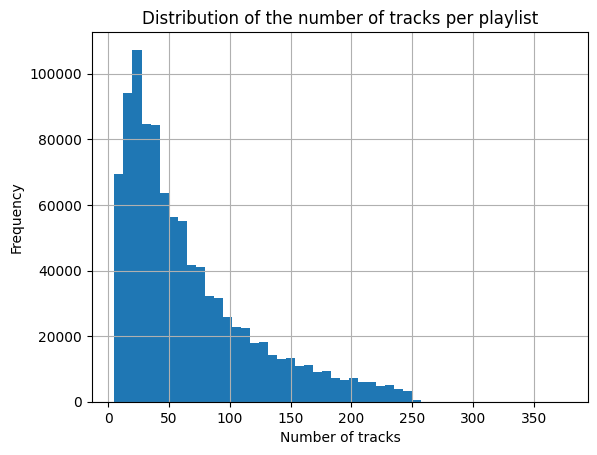

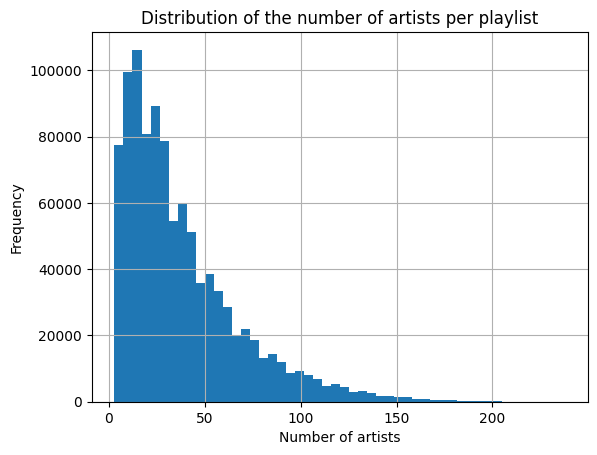

In [70]:
import matplotlib.pyplot as plt

# Histogram of the number of tracks per playlist
df["num_tracks"].compute().hist(bins=50)
plt.title("Distribution of the number of tracks per playlist")
plt.xlabel("Number of tracks")
plt.ylabel("Frequency")
plt.show()

# Histogram of the number of artists per playlist
df["num_artists"].compute().hist(bins=50)
plt.title("Distribution of the number of artists per playlist")
plt.xlabel("Number of artists")
plt.ylabel("Frequency")
plt.show()



Insight: 

- Most playlists contain a small to moderate number of tracks.
- The peak frequency is around 25 tracks
-More the number of tracks increases, more the frequency of playlists drops sharply.


In [64]:
# Number of unique tracks
nb_tracks = df_tracks["track_uri"].nunique().compute()

# Top 10 most frequent tracks
top_tracks = df_tracks["track_uri"].value_counts().nlargest(10).compute()

# Top 10 most frequent artists
top_artists = df_tracks["artist_name"].value_counts().nlargest(10).compute()

print("Number of unique tracks:", nb_tracks)
print("Top 10 most frequent tracks:")
print(top_tracks)

print("Top 10 most frequent artists:")
print(top_artists)



Number of unique tracks: 2262292
Top 10 most frequent tracks:
track_uri
spotify:track:7KXjTSCq5nL1LoYtL7XAwS    46574
spotify:track:1xznGGDReH1oQq0xzbwXa3    43447
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol    41309
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    41079
spotify:track:3a1lNhkSLSkpJE4MSHpDu9    39987
spotify:track:5hTpBe8h35rJ67eAWHQsJx    35202
spotify:track:2EEeOnHehOozLq4aS0n6SL    35138
spotify:track:4Km5HrUvYTaSUfiSGPJeQR    34999
spotify:track:7GX5flRQZVHRAGd6B4TmDO    34922
spotify:track:152lZdxL1OR0ZMW6KquMif    34657
Name: count, dtype: int64[pyarrow]
Top 10 most frequent artists:
artist_name
Drake             847160
Kanye West        413297
Kendrick Lamar    353624
Rihanna           339570
The Weeknd        316603
Eminem            294667
Ed Sheeran        272116
Future            250734
Justin Bieber     243119
J. Cole           241560
Name: count, dtype: int64[pyarrow]


In [71]:
# Descriptive statistics for playlists
stats_tracks = df_playlists["num_tracks"].describe().compute()
stats_duration = df_playlists["duration_ms"].describe().compute()

print("\nPlaylists:")
print("Distribution of the number of tracks per playlist:")
print(stats_tracks)
print("Distribution of the total duration of playlists (ms):")
print(stats_duration)



Playlists:
Distribution of the number of tracks per playlist:
count    1000000.000000
mean          66.346428
std           53.669358
min            5.000000
25%           27.000000
50%           51.000000
75%           94.000000
max          376.000000
Name: num_tracks, dtype: float64
Distribution of the total duration of playlists (ms):
count    1.000000e+06
mean     1.557968e+07
std      1.285643e+07
min      9.753800e+04
25%      6.182235e+06
50%      1.182293e+07
75%      2.197123e+07
max      6.350738e+08
Name: duration_ms, dtype: float64


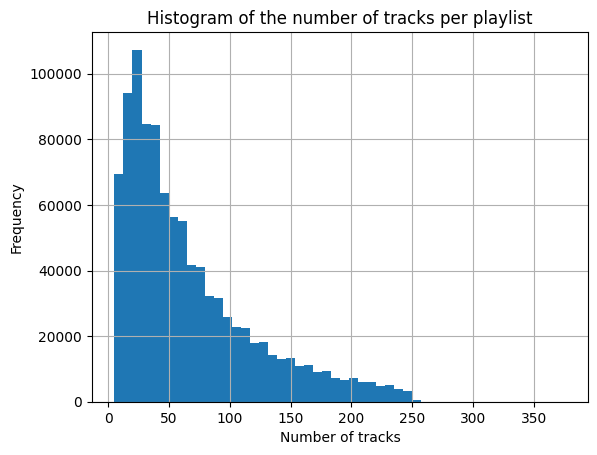

In [72]:
# Histogram of the number of tracks per playlist
df_playlists["num_tracks"].compute().hist(bins=50)
plt.title("Histogram of the number of tracks per playlist")
plt.xlabel("Number of tracks")
plt.ylabel("Frequency")
plt.show()


In [74]:
# Diversity
stats_artists = df_playlists["num_artists"].describe().compute()
stats_albums = df_playlists["num_albums"].describe().compute()

print("Diversity:")
print("Number of artists per playlist:")
print(stats_artists)
print("Number of albums per playlist:")
print(stats_albums)


Diversity:
Number of artists per playlist:
count    1000000.000000
mean          38.088211
std           30.282901
min            3.000000
25%           16.000000
50%           30.000000
75%           53.000000
max          238.000000
Name: num_artists, dtype: float64
Number of albums per playlist:
count    1000000.000000
mean          49.597278
std           39.961064
min            2.000000
25%           20.000000
50%           38.000000
75%           69.000000
max          244.000000
Name: num_albums, dtype: float64


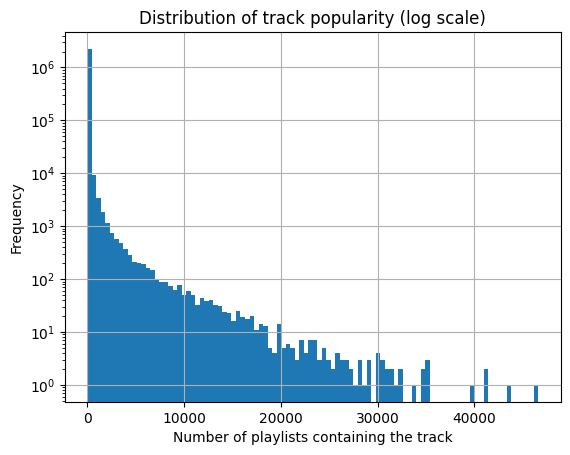

In [76]:
# Histogram of track popularity
df_tracks["track_uri"].value_counts().compute().hist(bins=100, log=True)
plt.title("Distribution of track popularity (log scale)")
plt.xlabel("Number of playlists containing the track")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#correlation
import pandas as pd

df_corr = df_playlists[["num_tracks", "num_artists", "duration_ms"]].compute()

print("\nCorrélations :")
print(df_corr.corr())


Corrélations :
             num_tracks  num_artists  duration_ms
num_tracks     1.000000     0.818381     0.980797
num_artists    0.818381     1.000000     0.798549
duration_ms    0.980797     0.798549     1.000000


insight: 
Tracks and Duration (0.98) : Extremely strong positive correlation. The more tracks a playlist has, the longer its total duration.

Tracks and Artists (0.82) : there is a Strong positive correlation. Playlists with more tracks tend to include more artists.

Artists and Duration (0.80) : Strong but weaker correlation compared to tracks vs. duration.

Takeaways : Longer playlists usually include more artists, but not always — some long playlists can still be dominated by a few artists.


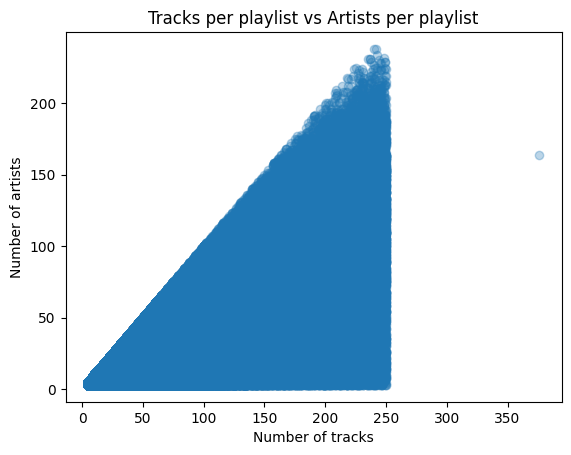

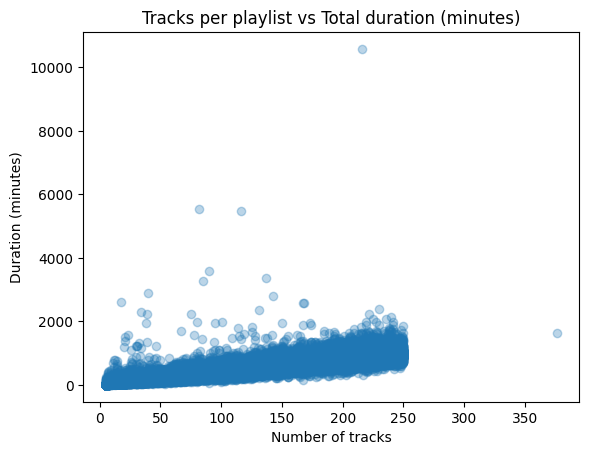

In [77]:
# Scatter plots
plt.scatter(df_corr["num_tracks"], df_corr["num_artists"], alpha=0.3)
plt.title("Tracks per playlist vs Artists per playlist")
plt.xlabel("Number of tracks")
plt.ylabel("Number of artists")
plt.show()

plt.scatter(df_corr["num_tracks"], df_corr["duration_ms"]/60000, alpha=0.3)
plt.title("Tracks per playlist vs Total duration (minutes)")
plt.xlabel("Number of tracks")
plt.ylabel("Duration (minutes)")
plt.show()

Insight: 
Strong positive correlation: The dense triangular pattern shows that as the number of tracks increases, the number of artists tends to increase too. 

Diversity grows with size: Most playlists with more tracks also include more artists. it means that users don’t just repeat the same artist over and over.

Outlier on the far right: One playlist has a very high number of tracks but relatively few artists. 

Insights:

Strong linear trend: Most points form a diagonal band, showing that more tracks generally mean longer duration. double confirmation of  the correlation (0.99) between track count and total duration.

Consistent average track length: The tight diagonal suggests that playlists have a fairly uniform average track duration — around 3–4 minutes per track.

Clustered bottom-left: Most playlists have fewer than 100 tracks and last under 400 minutes.

Outliers: A few playlists have very high durations or track counts, standing apart from the main cluster. 

In [78]:
# Single-artist playlists
mono_artist = (df_playlists["num_artists"] == 1).sum().compute()
print("Number of single-artist playlists:", mono_artist)

Number of single-artist playlists: 0


In [79]:
# Long Playlists 
long_playlists = (df_playlists["num_tracks"] > 100).sum().compute()
print("Nombre de playlists numbers with more than 100 tracks:", long_playlists)

Nombre de playlists numbers with more than 100 tracks: 216482


Word counts and similarity hypothesis 

In [89]:
import re
from collections import Counter

# Retrieve all playlist names
names = df_playlists["name"].dropna().compute().astype(str)

# Tokenize words (all in lowercase, only letters/numbers)
all_words = []
for n in names:
    words = re.findall(r"\w+", n.lower())  # split into words
    all_words.extend(words)

# Total number of words
nb_total_words = len(all_words)

# Number of unique words
nb_unique_words = len(set(all_words))

print("Total number of words:", nb_total_words)
print("Number of unique words:", nb_unique_words)

# Top 20 most frequent words
word_counts = Counter(all_words).most_common(20)
print("Top 20 most frequent words:")
for w, c in word_counts:
    print(f"{w}: {c}")



Total number of words: 1435706
Number of unique words: 10736
Top 20 most frequent words:
music: 26499
country: 22583
summer: 21896
songs: 20568
chill: 20473
rock: 19169
playlist: 16747
good: 16637
party: 16093
the: 15779
jams: 15732
new: 15613
rap: 15217
christmas: 12640
workout: 11857
2017: 11810
my: 11763
old: 11185
s: 11124
oldies: 11038


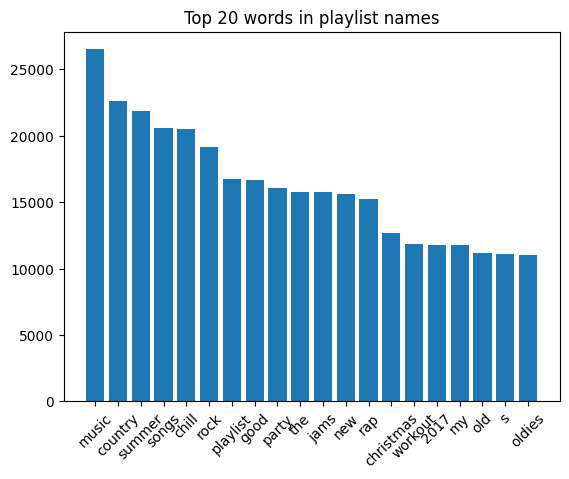

In [88]:
import matplotlib.pyplot as plt

# Top 20 words
top_words = dict(word_counts[:20])  # top 20 words
plt.bar(top_words.keys(), top_words.values())
plt.xticks(rotation=45)
plt.title('Top 20 words in playlist names')
plt.show()